# Desc

<b>The dataset is very unbalanced. </b> For example, C3S4 and C3S4 classes have only one sample. This situation is not good in respect of  using the oversampling methods. <br>

I tried to create a new class (called the other) by combining other classes which have a small sample size.
Finally, there are six classes to classify, named 'C2S1', 'C3S1', 'C3S2', 'C4S1', 'C4S2', 'Other'.


## Results

I have used optima for optimizing the model. The results were not very good. Although our model gained reasonable precision/recall scores in a few classes, some classes have bad scores.<br>

- (Test Set) R2 score : 82.851
- (Test Set) MAE : 0.207831

| class        	| precision 	| recall 	| f1-score 	| support 	|
|--------------	|-----------	|--------	|----------	|---------	|
| 0            	| 1.00      	| 0.97   	| 0.99     	| 76      	|
| 1            	| 0.97      	| 0.99   	| 0.98     	| 204     	|
| 2            	| 0.25      	| 0.17   	| 0.20     	| 6       	|
| 3            	| 0.88      	| 0.88   	| 0.88     	| 26      	|
| 4            	| 0.73      	| 0.67   	| 0.70     	| 12      	|
| 5            	| 0.62      	| 0.62   	| 0.62     	| 8       	|
| accuracy     	|           	|        	| 0.94     	| 332     	|
| macro avg    	| 0.74      	| 0.72   	| 0.73     	| 332     	|
| weighted avg 	| 0.94      	| 0.94   	| 0.94     	| 332     	|

# Install

In [57]:
# !pip install catboost
# !pip install scikit-learn
# !pip install seaborn
# !pip install numpy
# !pip install pandas
# !pip install mealpy
# !pip install pyswarms
# !pip install imbalanced-learn
# !pip install jupyterlab
# !pip install jupyter_http_over_ws
# !pip install xgboost
# # !pip install https://s3-us-west-2.amazonaws.com/xgboost-nightly-builds/release_2.0.0/xgboost-2.0.1%2Ba408254c2f0c4a39a04430f9894579038414cb31-py3-none-manylinux2014_x86_64.whl
# # !pip install --upgrade --no-cache-dir gdown
# # !jupyter serverextension enable --py jupyter_http_over_ws

# Code

In [58]:
# Importing dependencies

import warnings
warnings.filterwarnings('ignore')
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn import metrics
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from catboost import CatBoostClassifier, Pool

## <span style="color:#e74c3c;"> Reading </span> Data


In [59]:
# !gdown 1SaxJ8KPMrV37ZsVTv5F5ava5aXtGRiSn
# !gdown 1E6BZ-AEncUOWlsK96SFz5wBK8w7XjmVB
# !gdown 195J88Onvr23J8HdFtO3D_Yezi97clcZ9
# !gdown 1C4ERjxVqEnxTGxwQVz98u3gaxA_hnzrH
# !gdown 10KFETqq39CXdFP2zTqPgRKOGqFuVlhL9
# !gdown 1I5c33LgqPIjtSFAThzIYFYllWgrzNTT0
# !gdown 1S6YYB6ew3CdlIT8YtMCLw-g0WJlmV6D1
# !gdown 1Xnhm2FD-mDuX6AQ-Nqs-OHd5s5zWyn3e
# !gdown 1oykno6YaFS6Fx9G8sI4RlqVnu36x693F
# !gdown 1wDqaIzte9f5KLfEOTa0r9a6QrKZ34_Yx

In [60]:
# Reading data

data1 = pd.read_csv('./ground_water_quality_2018_post.csv')
data2 = pd.read_csv('./ground_water_quality_2019_post.csv')
data3 = pd.read_csv('./ground_water_quality_2020_post.csv')
data4 = pd.read_csv('./ground_water_quality_2020_post.csv')
data5 = pd.read_csv('./ground_water_quality_2020_post.csv')
data6 = pd.read_csv('./ground_water_quality_2018_pre.csv')
data7 = pd.read_csv('./ground_water_quality_2019_pre.csv')
data8 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data9 = pd.read_csv('./ground_water_quality_2020_pre.csv')
data10 = pd.read_csv('./ground_water_quality_2020_pre.csv')

## Pre Processing

In [61]:

data2.rename( columns ={ 'EC' : 'E.C', 'CO_-2 ' : 'CO3', 'HCO_ - ' :'HCO3', 'Cl -' : 'Cl',
                        'F -' : 'F', 'NO3- ': 'NO3 ' , 'SO4-2':'SO4' , 'Na+':'Na', 'K+':'K',
                        'Ca+2' : 'Ca', 'Mg+2':'Mg'}, inplace = True)

# Create a list of column names to drop
columns_to_drop = ['sno', 'season', 'Unnamed: 8']
list_data = [data1, data2, data3, data4, data5, data6, data7, data8, data9, data10]

# Loop through your dataframes and drop the columns if they exist
for df in list_data:
    for col in columns_to_drop:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)

# creating new columns
data1['year'] = 2018
data2['year'] = 2019
data3['year'] = 2020
data4['year'] = 2021
data5['year'] = 2022
data6['year'] = 2018
data7['year'] = 2019
data8['year'] = 2020
data9['year'] = 2021
data10['year'] = 2022



# handling and fixing outliers
data3['pH'].iloc[261] = data3['pH'].iloc[261].replace('8..05', '8.05')
data3['pH'] = data3['pH'].apply(pd.to_numeric)

for df in list_data:
    df['Classification'] = df['Classification'].replace(['O.G'], 'OG')

In [62]:
data_full = pd.concat([data1, data2, data3, data4, data5, data6, data7, data8, data9, data10], axis = 0)
data_full.to_csv('ground_water_merge.csv', index=False)

In [63]:
len(data_full)

3645

In [64]:
# creating and applying the new_class function

def new_class(X):
    # if (X == 'C3S4') | (X == 'C2S2') | (X == 'C4S4') | (X == 'C3S3') | (X == 'C4S3') | (X == 'OG')  | (X == 'C1S1')  :
    if (X == 'C1S1'):
        return 'Sangat Baik'
    elif (X == 'C1S2') | (X == 'C2S1') | (X == 'C2S2'):
        return 'Baik'
    elif (X == 'C1S3') | (X == 'C3S1'):
        return 'Boleh Digunakan'
    elif (X == 'C2S3') | (X == 'C3S2') | (X == 'C3S3'):
        return 'Marginal'
    elif (X == 'C1S4') | (X == 'C2S4') | (X == 'C3S4') | (X == 'C4S1') | (X == 'C4S2'):
        return 'Buruk'
    elif  (X == 'C4S3') | (X == 'C4S4') :
        return 'Sangat Buruk'
    elif ( X == 'OG') | (X == "BELOW THE GRAPH") :
        return 'Other'
    else:
        return X

data_full['Classification'] = data_full['Classification'].apply(new_class)

In [65]:
def rsc_class(x):
    if x < 1.25:
        return 2
    elif 1.25 <= x <= 2.5:
        return 1
    else:
        return 0

data_full['rsc_class'] = data_full['RSC  meq  / L'].apply(rsc_class)

In [66]:
def tds_class(x):
    if x < 1000:
        return 5
    elif 1000 <= x < 3000:
        return 4
    elif 3000 <= x < 5000:
        return 3
    elif 5000 <= x < 7000:
        return 2
    elif 7000 <= x < 10000:
        return 1
    else:
        return 0

data_full['tds_class'] = data_full['TDS'].apply(tds_class)

In [67]:
# cols2drop = ['district','mandal', 'village', 'lat_gis', 'long_gis', 'Classification.1', 'Unnamed: 8']
cols2drop = ['district', 'mandal', 'village', 'Classification.1', 'temp_id', 'E.C', 'TDS', 'T.H']
# cols2drop = ['Classification.1', 'Unnamed: 8']
data_full_copy = data_full
data_full = data_full[data_full['Classification'] != 'Other']
data_full = data_full[data_full['pH'] != "Sample Leaked Out"]
data_full['pH'] = data_full['pH'].replace('8..05', '8.05')
data_full['pH'] = data_full['pH'].apply(pd.to_numeric)

data_full = data_full.drop(cols2drop, axis=1)

In [68]:
len(data_full)

3630

In [69]:
class_distribution = data_full['Classification'].value_counts()
# check class distribution
print(class_distribution)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64


In [70]:
# total null elements
data_full.isnull().sum()[data_full.isnull().sum() > 0]

gwl                48
CO3               161
HCO3                1
Cl                  1
F                   1
NO3                 1
SO4                 1
Na                  1
K                   1
Ca                  1
Mg                  1
SAR                 1
Classification      1
RSC  meq  / L       1
dtype: int64

In [71]:
# imputing null values

imp_knn = KNNImputer(n_neighbors=3)

data_full['CO3'] = imp_knn.fit_transform(np.array(data_full['CO3']).reshape(-1,1) )
data_full['gwl'] = imp_knn.fit_transform(np.array(data_full['gwl']).reshape(-1,1) )

In [72]:
data_full.isnull().sum()[data_full.isnull().sum() > 0]

HCO3              1
Cl                1
F                 1
NO3               1
SO4               1
Na                1
K                 1
Ca                1
Mg                1
SAR               1
Classification    1
RSC  meq  / L     1
dtype: int64

In [73]:
data_full = data_full.dropna()

In [74]:
data_full.head()

,lat_gis,long_gis,gwl,pH,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,SAR,Classification,RSC meq / L,year,rsc_class,tds_class
0,19.668300,78.524700,5.09,8.28,0.0,220.0,60.0,0.44,42.276818,46.0,49.0,4.0,48.0,38.896,1.273328,Baik,-1.198684,2018,2,5
1,19.458888,78.350833,5.10,8.29,0.0,230.0,80.0,0.56,100.659091,68.0,42.0,5.0,56.0,63.206,0.913166,Boleh Digunakan,-3.397862,2018,2,5
2,19.525555,78.512222,4.98,7.69,0.0,200.0,30.0,0.66,41.471545,44.0,45.0,2.0,24.0,38.896,1.319284,Baik,-0.398684,2018,2,5
3,19.730555,78.640000,5.75,8.09,0.0,160.0,10.0,0.58,10.669864,35.0,27.0,1.0,32.0,19.448,0.928155,Baik,0.000658,2018,2,5
4,19.495665,78.852654,2.15,8.21,0.0,300.0,340.0,2.56,128.843636,280.0,298.0,5.0,56.0,92.378,5.682664,Buruk,-4.396875,2018,2,4


array([[<Axes: title={'center': 'lat_gis'}>,
        <Axes: title={'center': 'long_gis'}>,
        <Axes: title={'center': 'gwl'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'CO3'}>,
        <Axes: title={'center': 'HCO3'}>, <Axes: title={'center': 'Cl'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'NO3 '}>,
        <Axes: title={'center': 'SO4'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Mg'}>,
        <Axes: title={'center': 'SAR'}>,
        <Axes: title={'center': 'RSC  meq  / L'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'rsc_class'}>,
        <Axes: title={'center': 'tds_class'}>, <Axes: >]], dtype=object)

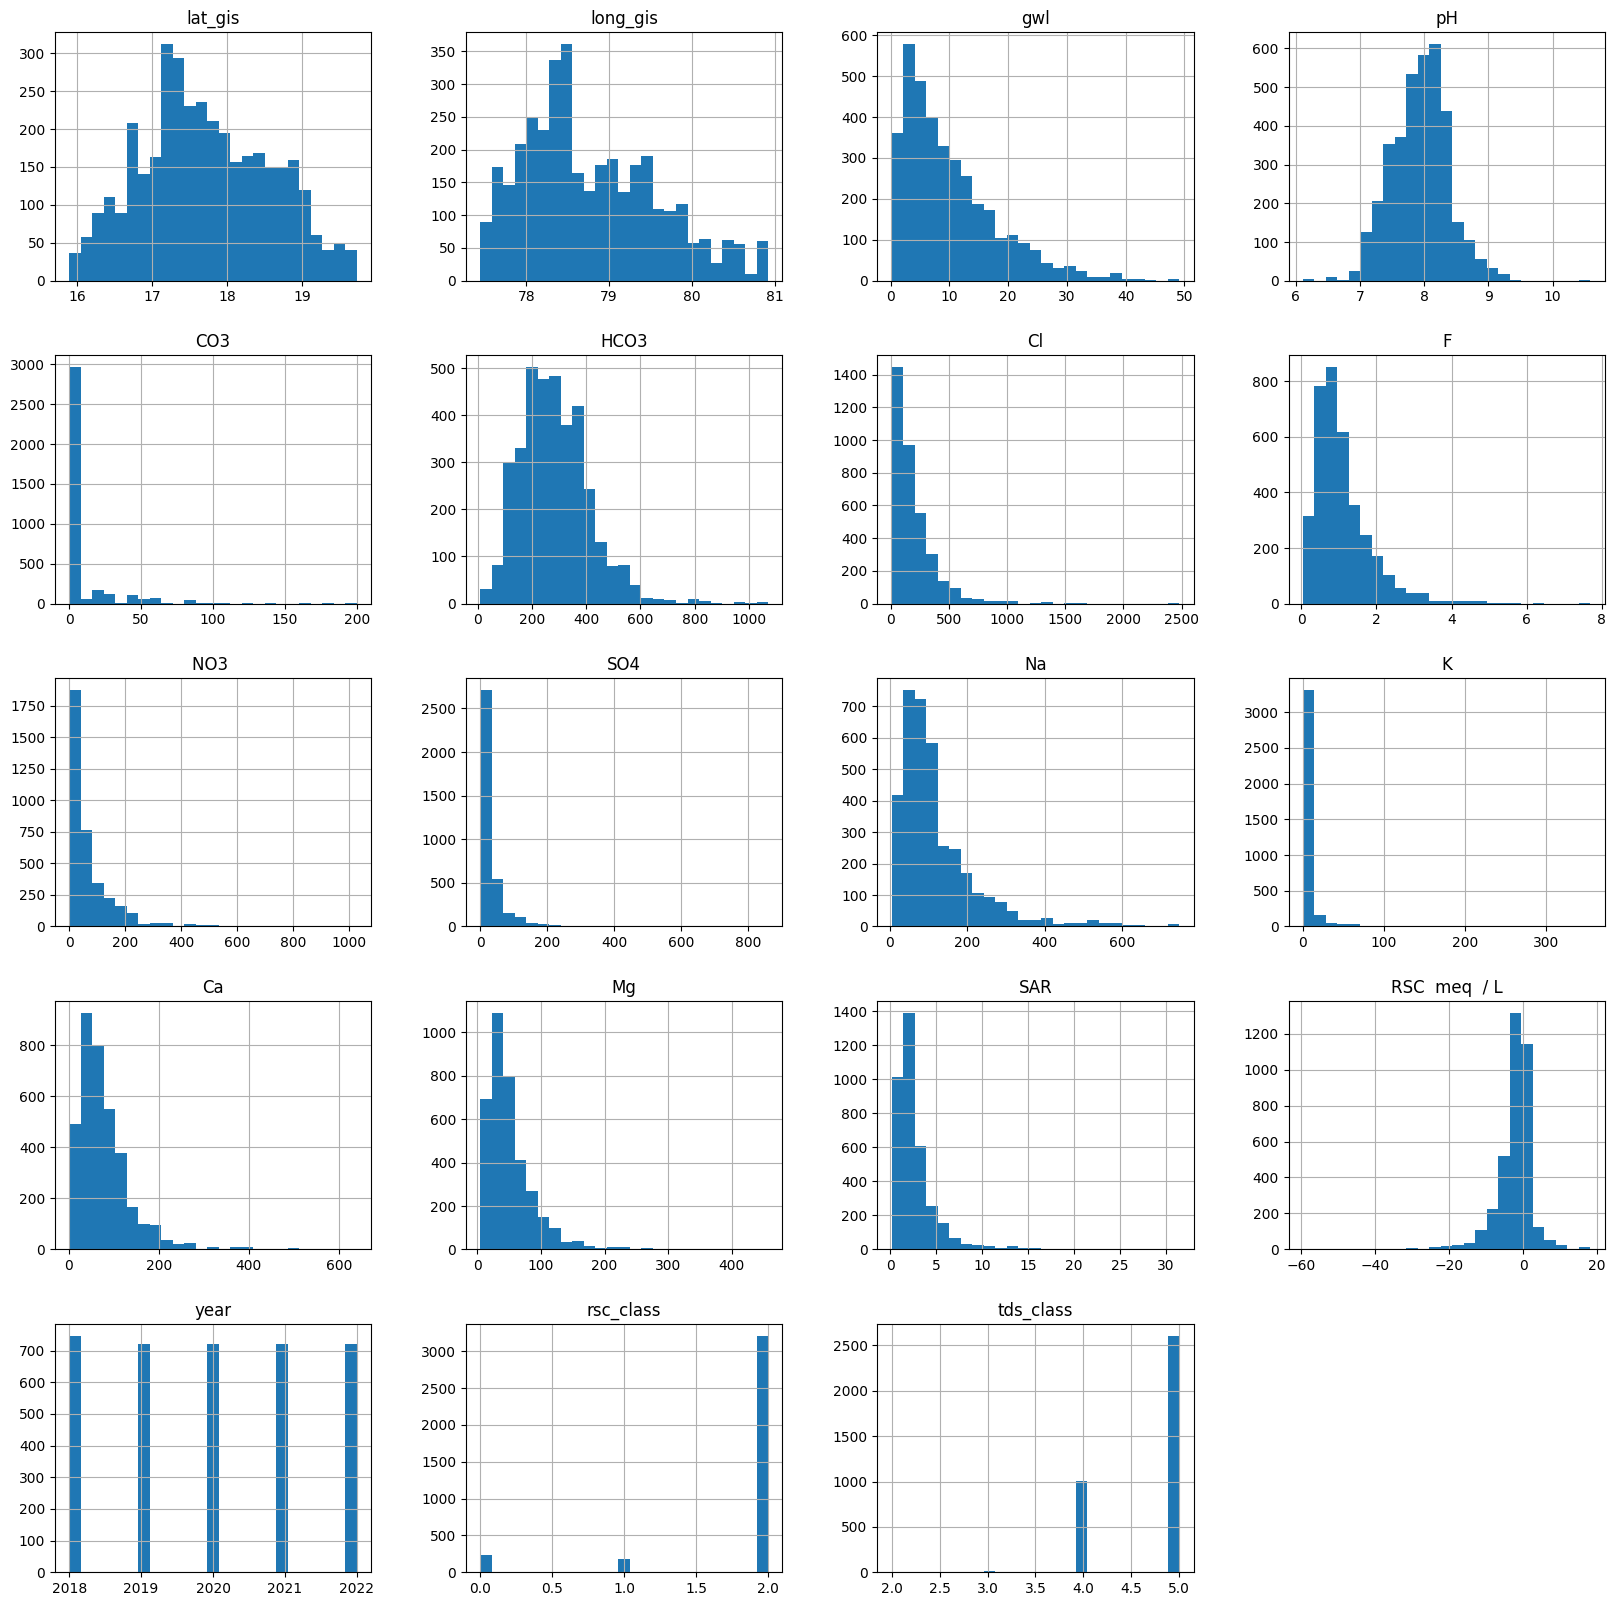

In [75]:
data_full.hist(bins=25,figsize=(20,20))

<Axes: >

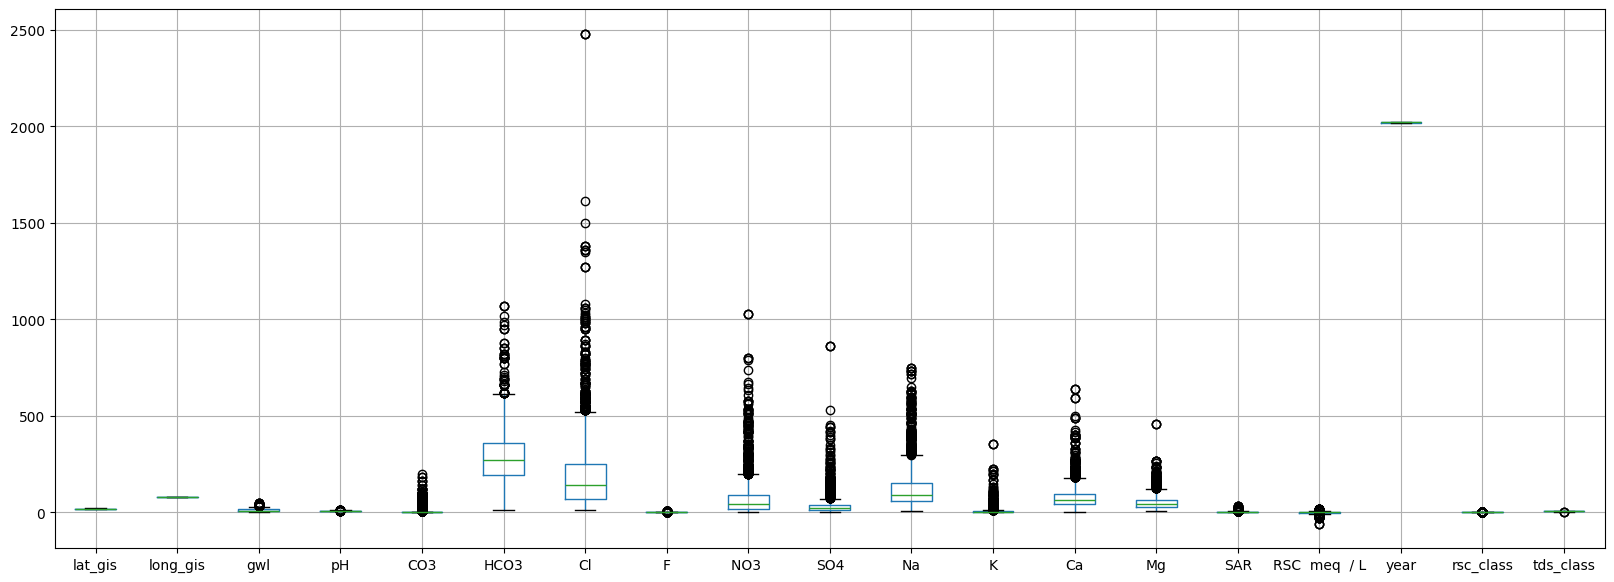

In [76]:
data_full.boxplot(figsize=(20,7))

In [77]:
data_copy=data_full.copy()
data_copy=data_copy.drop(columns="Classification")

In [78]:
Q1 =data_copy.quantile(0.25)
Q3 = data_copy.quantile(0.75) 
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 1.5

# Calculate lower and upper bounds for outliers
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify outliers for each feature
outliers = ((data_copy< lower_bound) | (data_copy> upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Display the number of outliers for each feature
print("Number of Outliers:")
print(outlier_counts)

Number of Outliers:
lat_gis            0
long_gis           0
gwl              114
pH                40
CO3              823
HCO3              55
Cl               204
F                171
NO3              271
SO4              362
Na               214
K                385
Ca               220
Mg               165
SAR              253
RSC  meq  / L    306
year               0
rsc_class        418
tds_class          3
dtype: int64


In [79]:
data_full.columns

Index(['lat_gis', 'long_gis', 'gwl', 'pH', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ',
       'SO4', 'Na', 'K', 'Ca', 'Mg', 'SAR', 'Classification', 'RSC  meq  / L',
       'year', 'rsc_class', 'tds_class'],
      dtype='object')

In [80]:
import numpy as np

data_full["gwl"] = np.sqrt(data_full["gwl"])
columns_to_transform = ["CO3","HCO3","F","NO3 ","Na","Mg"]
data_full[columns_to_transform] = np.cbrt(data_full[columns_to_transform])

columns_to_transform = ["Cl","SO4","K","Ca","SAR"]
data_full[columns_to_transform] = np.log10(data_full[columns_to_transform])

array([[<Axes: title={'center': 'lat_gis'}>,
        <Axes: title={'center': 'long_gis'}>,
        <Axes: title={'center': 'gwl'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'CO3'}>,
        <Axes: title={'center': 'HCO3'}>, <Axes: title={'center': 'Cl'}>,
        <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'NO3 '}>,
        <Axes: title={'center': 'SO4'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Mg'}>,
        <Axes: title={'center': 'SAR'}>,
        <Axes: title={'center': 'RSC  meq  / L'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'rsc_class'}>,
        <Axes: title={'center': 'tds_class'}>, <Axes: >]], dtype=object)

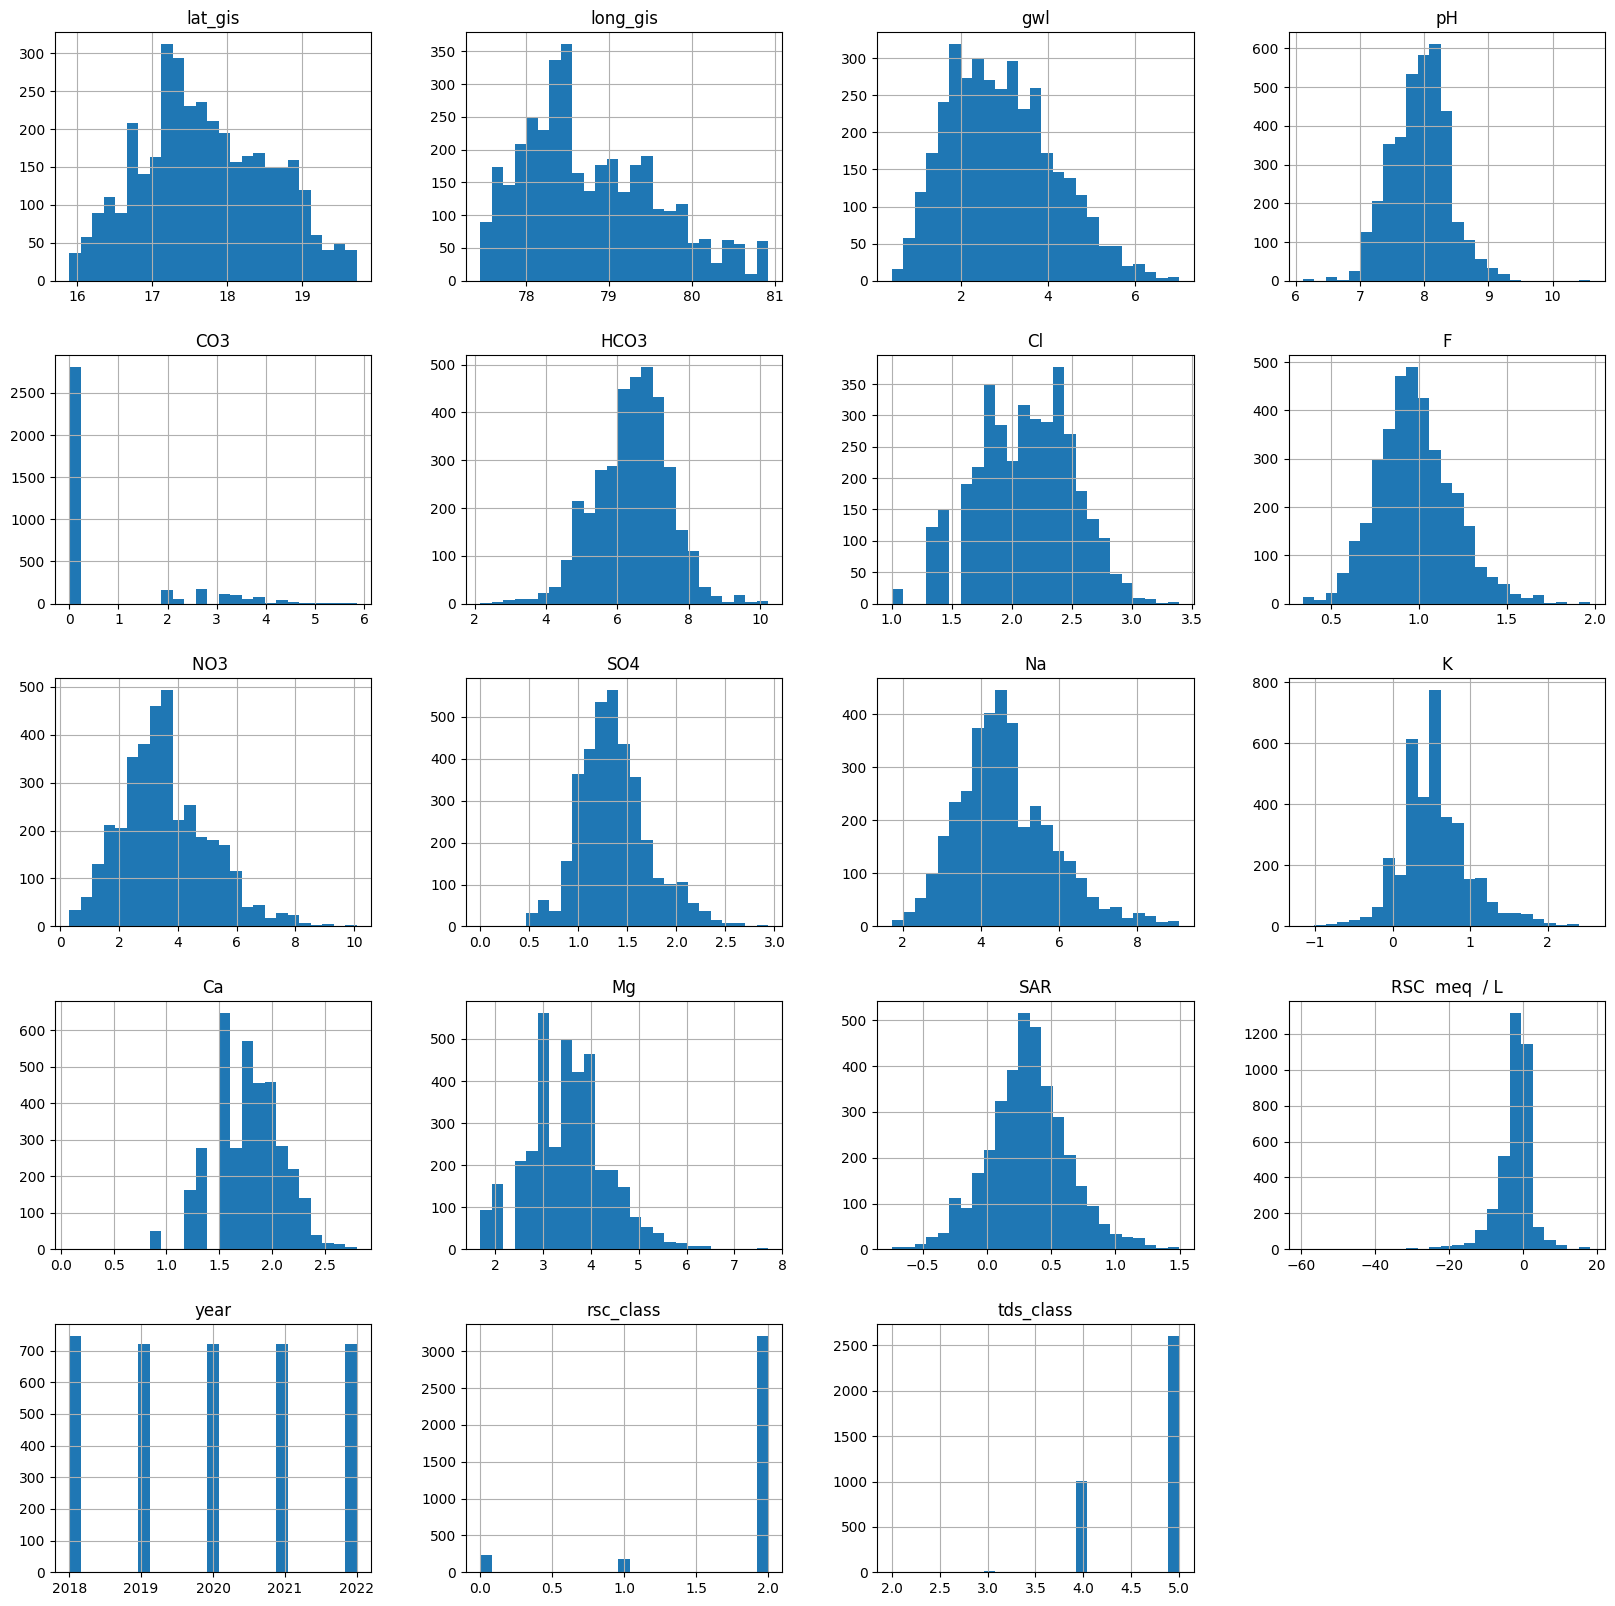

In [81]:
data_full.hist(bins=25,figsize=(20,20))

In [82]:
# creating train data and target

X = data_full.copy()
X.drop('Classification', axis= 1, inplace = True)

y = data_full['Classification']

In [83]:
X.dtypes

lat_gis          float64
long_gis         float64
gwl              float64
pH               float64
CO3              float64
HCO3             float64
Cl               float64
F                float64
NO3              float64
SO4              float64
Na               float64
K                float64
Ca               float64
Mg               float64
SAR              float64
RSC  meq  / L    float64
year               int64
rsc_class          int64
tds_class          int64
dtype: object

In [84]:
pd.value_counts(y)

Classification
Boleh Digunakan    2314
Baik                796
Buruk               356
Marginal            104
Sangat Buruk         43
Sangat Baik          16
Name: count, dtype: int64

In [85]:
LB = LabelEncoder()
y = LB.fit_transform(y)
LB.classes_

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [86]:
original_classes = LB.inverse_transform(y)
np.unique(original_classes)

array(['Baik', 'Boleh Digunakan', 'Buruk', 'Marginal', 'Sangat Baik',
       'Sangat Buruk'], dtype=object)

In [87]:
# categorical features

cat_feat_idx =  np.where(X.dtypes == 'object')[0]
cat_feat_idx

array([], dtype=int64)

In [88]:
X.iloc[:, 3:15]

,pH,CO3,HCO3,Cl,F,NO3,SO4,Na,K,Ca,Mg,SAR
0,8.28,0.0,6.036811,1.778151,0.760590,3.483647,1.662758,3.659306,0.602060,1.681241,3.388194,0.104940
1,8.29,0.0,6.126926,1.903090,0.824257,4.651764,1.832509,3.476027,0.698970,1.748188,3.983389,-0.039450
2,7.69,0.0,5.848035,1.477121,0.870659,3.461386,1.643453,3.556893,0.301030,1.380211,3.388194,0.120338
3,8.09,0.0,5.428835,1.000000,0.833955,2.201505,1.544068,3.000000,0.000000,1.505150,2.689212,-0.032379
4,8.21,0.0,6.694330,2.531479,1.367981,5.050732,2.447158,6.679420,0.698970,1.748188,4.520532,0.754552
...,...,...,...,...,...,...,...,...,...,...,...,...
350,7.40,0.0,6.619106,2.477121,1.035399,7.586839,1.505150,5.289572,0.301030,2.158362,4.673886,0.362535
351,7.88,0.0,7.243156,2.230449,1.306477,3.289934,1.397940,4.918685,0.731589,1.857332,3.878514,0.402246
352,7.66,0.0,6.619106,1.602060,1.320006,2.449898,1.000000,3.518272,0.442480,1.748188,3.240691,0.053726
353,7.63,0.0,7.047299,3.139879,0.928318,3.329024,2.021189,8.102839,0.863323,2.602060,4.268857,0.803918


In [89]:
# scaling numerical data

MX = MinMaxScaler()
X.iloc[:, 3:15] = MX.fit_transform(X.iloc[:, 3:15])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33 , shuffle = True, stratify=y, random_state= 42)

print(X_train.shape)
print(X_test.shape)

(2431, 19)
(1198, 19)


In [91]:
pd.value_counts(y_train)

1    1550
0     533
2     238
3      70
5      29
4      11
Name: count, dtype: int64

In [92]:
def calculate_sampling_strategy(y_train, min_samples=534):
    class_counts = pd.value_counts(y_train)
    sampling_strategy = {}
    min_count = class_counts.min()
    max_count = class_counts.max()
    for class_label, count in class_counts.items():
        if count < min_samples:
            # Calculate a factor based on the ratio of the count to the max count
            factor = (max_count / count) ** 0.68  # The power makes the factor smaller for larger counts
            new_count = int(count * factor)
            # Ensure the new count is not more than max_count
            new_count = min(new_count, max_count)
            sampling_strategy[class_label] = new_count
        else:
            sampling_strategy[class_label] = count
    return sampling_strategy

sampling_strategy = calculate_sampling_strategy(y_train)

In [93]:
sampling_strategy

{1: 1550, 0: 1101, 2: 851, 3: 575, 5: 433, 4: 318}

In [94]:
# balancing class
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE
from imblearn.combine import SMOTEENN
smote = ADASYN(sampling_strategy=sampling_strategy, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
#SMOTE Training data

In [95]:
X_train.dtypes

lat_gis          float64
long_gis         float64
gwl              float64
pH               float64
CO3              float64
HCO3             float64
Cl               float64
F                float64
NO3              float64
SO4              float64
Na               float64
K                float64
Ca               float64
Mg               float64
SAR              float64
RSC  meq  / L    float64
year               int64
rsc_class          int64
tds_class          int64
dtype: object

In [96]:
pd.value_counts(y_train)

1    1550
0    1050
2     831
3     572
5     437
4     317
Name: count, dtype: int64

In [97]:
y_class = np.unique(y_train)
y_class

array([0, 1, 2, 3, 4, 5])

In [98]:
# creating class weights
unique_classes = np.unique(y)
weights = compute_class_weight(class_weight='balanced', classes=unique_classes, y=y_train)
class_weights = dict(zip(unique_classes, weights))
class_weights

{0: 0.7550793650793651,
 1: 0.511505376344086,
 2: 0.9540713999197754,
 3: 1.3860722610722611,
 4: 2.5010515247108307,
 5: 1.8142639206712434}

In [99]:
# creating pools for training and testing

train_pool = Pool(X_train, y_train, cat_features = cat_feat_idx)
test_pool = Pool(X_test, y_test, cat_features = cat_feat_idx)

In [100]:
device_type = 'GPU'

## Base Model

### CatBoost Classifier


In [101]:
# cb_model = CatBoostClassifier(iterations= 6000, task_type=device_type, devices='0:1', learning_rate = 0.0039, depth=5, l2_leaf_reg=0.3, min_data_in_leaf = 27, class_weights=class_weights)
cb_model = CatBoostClassifier(task_type=device_type, devices='0:1')

cb_model.fit(train_pool, verbose = 1000 )

Learning rate set to 0.089219
0:	learn: 1.5013926	total: 6.72ms	remaining: 6.72s


999:	learn: 0.0093083	total: 7.27s	remaining: 0us


In [102]:
importances = cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X.columns).sort_values()

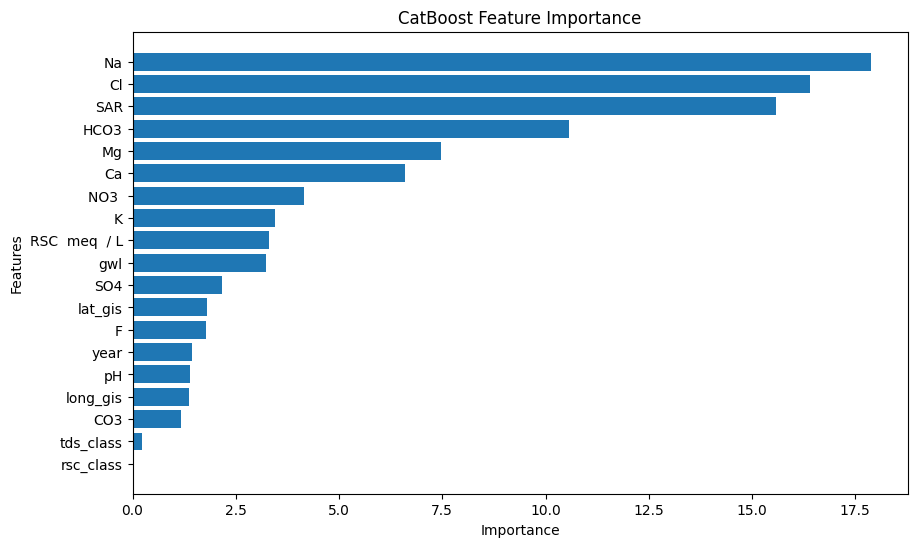

In [103]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [104]:
cb_model.get_all_params()

{'nan_mode': 'Min',
 'gpu_ram_part': 0.95,
 'eval_metric': 'MultiClass',
 'iterations': 1000,
 'leaf_estimation_method': 'Newton',
 'observations_to_bootstrap': 'TestOnly',
 'random_score_type': 'NormalWithModelSizeDecrease',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'feature_border_type': 'GreedyLogSum',
 'bayesian_matrix_reg': 0.10000000149011612,
 'devices': '0:1',
 'eval_fraction': 0,
 'pinned_memory_bytes': '104857600',
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'gpu_cat_features_storage': 'GpuRam',
 'fold_size_loss_normalization': False,
 'model_size_reg': 0.5,
 'pool_metainfo_options': {'tags': {}},
 'use_best_model': False,
 'meta_l2_frequency': 0,
 'class_names': [0, 1, 2, 3, 4, 5],
 'random_seed': 0,
 'depth': 6,
 'border_count': 128,
 'min_fold_size': 100,
 'data_partition': 'DocParallel',
 'bagging_temperature': 1,
 'classes_count': 0,
 'auto_clas

## Swarm Intelligence

### Feature Selection

#### PSO

In [105]:
import pyswarms as ps
from mealpy import FloatVar, IntegerVar, PSO

In [106]:
labels = [0, 1, 2, 3, 4, 5]

In [107]:
import random
from sklearn.ensemble import RandomForestClassifier

def objective_function_features_cb(x):
    x = np.round(x).astype(bool)
    # print(x)
    selected_features = x
    if not np.any(selected_features):
        selected_features[random.randint(0, len(selected_features)-1)] = True
    X_train_selected = X_train.iloc[:, selected_features]
    X_test_selected = X_test.iloc[:, selected_features]
    train_pool_select = Pool(X_train_selected, y_train, cat_features = cat_feat_idx)
    test_pool_select = Pool(X_test_selected, y_test, cat_features = cat_feat_idx)
    cb_model_i = CatBoostClassifier(task_type=device_type, devices='0:1')
    # rf_model = RandomForestClassifier()
    # rf_model.fit(X_train_selected, y_train)
    cb_model_i.fit(train_pool_select, verbose = 0)
    y_pred = cb_model_i.predict(test_pool_select)
    f1score = f1_score(y_test, y_pred, average="macro")
    return f1score

In [108]:
n_features = X_train.shape[1]

problem_dict_features_cb = {
    "bounds": IntegerVar(lb=np.zeros(n_features, dtype=int), ub=np.ones(n_features, dtype=int), name="delta"),
    "minmax": "max",
    "obj_func": objective_function_features_cb,
    # "obj_weights": [0.6,0.4]
}

In [109]:
model_feat_pso_cb = PSO.OriginalPSO(epoch=20, pop_size=20, c1=2.05, c2=2.05, w=0.7)
g_best_feat_pso_cb = model_feat_pso_cb.solve(problem_dict_features_cb)

2023-11-23 17:36:39,576 - mealpy.swarm_based.PSO.OriginalPSO - INFO - Solving single objective optimization problem.
2023-11-23 17:41:24,166 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 1, Current best: 0.9047425128165557, Global best: 0.9047425128165557, Runtime: 151.09971 seconds
2023-11-23 17:44:05,945 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 2, Current best: 0.928628530604993, Global best: 0.928628530604993, Runtime: 161.77701 seconds
2023-11-23 17:46:48,527 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 3, Current best: 0.9356204455478615, Global best: 0.9356204455478615, Runtime: 162.57975 seconds
2023-11-23 17:49:21,561 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 4, Current best: 0.952790044054237, Global best: 0.952790044054237, Runtime: 153.03149 seconds
2023-11-23 17:51:54,316 - mealpy.swarm_based.PSO.OriginalPSO - INFO - >>>Problem: P, Epoch: 5, Current best: 0.952790044054237, Glo

In [110]:
print(f"Solution: {g_best_feat_pso_cb.solution}, Fitness: {g_best_feat_pso_cb.target.fitness}")

Solution: [0.29835401 0.92964953 0.20577037 0.19142162 0.06839221 0.01612335
 0.26577801 0.22737857 0.49850805 0.72832867 0.62036047 0.52967082
 0.81122375 0.53243742 0.24466275 0.40842479 0.69788894 0.04279009
 0.81564688], Fitness: 0.952790044054237


In [119]:
feat_solution_bool_pso = np.round(g_best_feat_pso_cb.solution).astype(bool)
print(f"Solution: {feat_solution_bool_pso}, Fitness: {g_best_feat_pso_cb.target.fitness}")

Solution: [False  True False False False False False False False  True  True  True
  True  True False False  True False  True], Fitness: 0.952790044054237


#### SSA

In [111]:
from mealpy import SSA

In [112]:
model_feat_ssa_cb = SSA.OriginalSSA(epoch=20, pop_size=20, ST = 0.8, PD = 0.2, SD = 0.1)
g_best_feat_ssa_cb = model_feat_ssa_cb.solve(problem_dict_features_cb)

2023-11-23 18:29:49,755 - mealpy.swarm_based.SSA.OriginalSSA - INFO - Solving single objective optimization problem.
2023-11-23 18:35:44,510 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 1, Current best: 0.9369449878874015, Global best: 0.9369449878874015, Runtime: 240.75386 seconds
2023-11-23 18:39:55,199 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 2, Current best: 0.93964176342925, Global best: 0.93964176342925, Runtime: 250.68523 seconds
2023-11-23 18:44:38,563 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 3, Current best: 0.93964176342925, Global best: 0.93964176342925, Runtime: 283.36151 seconds
2023-11-23 18:49:40,056 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 4, Current best: 0.93964176342925, Global best: 0.93964176342925, Runtime: 301.49168 seconds
2023-11-23 18:54:11,109 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 5, Current best: 0.93964176342925, Global best:

In [113]:
print(f"Solution: {g_best_feat_ssa_cb.solution}, Fitness: {g_best_feat_ssa_cb.target.fitness}")

Solution: [0.05225658 0.62405504 0.0981785  0.65337725 0.87437147 0.06720491
 0.10896224 0.35090982 0.80046414 0.60610289 0.74417714 0.57799513
 0.57410223 0.72493094 0.39562002 0.41507337 0.05115869 0.06023836
 0.18577647], Fitness: 0.9601648467282625


In [117]:
feat_solution_bool_ssa = np.round(g_best_feat_ssa_cb.solution).astype(bool)
print(f"Solution: {feat_solution_bool_ssa}, Fitness: {g_best_feat_ssa_cb.target.fitness}")

Solution: [False  True False  True  True False False False  True  True  True  True
  True  True False False False False False], Fitness: 0.9601648467282625


#### Compare Fitness Value

In [114]:
if g_best_feat_pso_cb.target.fitness > g_best_feat_ssa_cb.target.fitness:
    g_best = g_best_feat_pso_cb
else:
    g_best = g_best_feat_ssa_cb

In [115]:
x = g_best.solution
x = np.round(x).astype(bool)
x

array([False,  True, False,  True,  True, False, False, False,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False])

In [116]:
selected_features = x
X_train_selected = X_train.iloc[:, selected_features]
X_test_selected = X_test.iloc[:, selected_features]
train_pool_select = Pool(X_train_selected, y_train, cat_features = cat_feat_idx)
test_pool_select = Pool(X_test_selected, y_test, cat_features = cat_feat_idx)

In [120]:
cb_model_feat = CatBoostClassifier(task_type=device_type, devices='0:1')
cb_model_feat.fit(train_pool_select, verbose = 1000 )

Learning rate set to 0.089219
0:	learn: 1.5261713	total: 12.7ms	remaining: 12.7s
999:	learn: 0.0135406	total: 8.37s	remaining: 0us


### Hyperparameter Optimization

In [244]:
def objective_function_cb(x):
    # x = x.astype(int)
    x = x.reshape(-1)
    params = {
        'iterations': int(x[0]),
        'depth': int(x[1]),
        'learning_rate': float(x[2]),
        'min_data_in_leaf': int(x[3]),
        'l2_leaf_reg': float(x[4]),
        # 'one_hot_max_size': 254,
        # 'class_weights': class_weights,
        'task_type': device_type,
        'devices': '0:1',
        'cat_features': cat_feat_idx,
        'verbose': 0,
    }

    cbof_model = CatBoostClassifier(**params)
    cbof_model.fit(train_pool_select)
    y_pred = cbof_model.predict(test_pool_select)
    f1score = f1_score(y_test, y_pred, average="macro")
    auroc_list = []
    # ytest_bin = label_binarize(y_test, classes=labels)
    # ypreds_bin = label_binarize(y_pred, classes=labels)
    # roc_auc_score = metrics.roc_auc_score(ytest_bin, ypreds_bin, average='macro', multi_class='ovo')
    # print('AUC:', roc_auc_score)
    return f1score

In [245]:

problem_dict_cb = {
    "bounds": FloatVar(lb=(1000, 2, 0.001, 20, 0.1), ub=(3000, 8, 0.1, 35, 1.0), name="delta"),
    "minmax": "max",
    "obj_func": objective_function_cb,
}

#### PSO

In [ ]:
model_pso_cb = PSO.OriginalPSO(epoch=20, pop_size=20, c1=2.05, c2=2.05, w=0.7)
g_best_pso_cb = model_pso_cb.solve(problem_dict_cb)

In [193]:
print(f"Solution: {g_best_pso_cb.solution}, Fitness: {g_best_pso_cb.target.fitness}")

Solution: [7.69173179e+02 6.76517045e+00 8.44732205e-02 2.48112519e+01
 8.87928830e-01], Fitness: 0.8857117337361995


In [194]:
len(g_best_pso_cb.solution)

5

In [128]:
best_param_pso_cb = [1497, 5, 0.041715994948692686, 23, 0.19786526945302252]

In [227]:
print("Best hyperparameters:", g_best_pso_cb.target.fitness)
print("iteration:", int(g_best_pso_cb.solution[0]))
print("depth:", int(g_best_pso_cb.solution[1]))
print("learning_rate:", float(g_best_pso_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_pso_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_pso_cb.solution[4]))


Best hyperparameters: 0.8857117337361995
iteration: 769
depth: 6
learning_rate: 0.08447322050013555
min_data_in_leaf: 24
l2_leaf_reg: 0.8879288302102818


In [130]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_pso_cb = {
    'iterations': int(best_param_pso_cb[0]),
    'depth': int(best_param_pso_cb[1]),
    'learning_rate': float(best_param_pso_cb[2]),
    'min_data_in_leaf': int(best_param_pso_cb[3]),
    "l2_leaf_reg": float(best_param_pso_cb[4]),
    # 'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [132]:
pso_cb_model = CatBoostClassifier(**best_hyperparameters_pso_cb)
pso_cb_model.fit(train_pool_select , verbose = 1000 )

0:	learn: 1.6666085	total: 9.12ms	remaining: 13.6s
1000:	learn: 0.0183279	total: 7.31s	remaining: 3.62s
1496:	learn: 0.0082347	total: 10.4s	remaining: 0us


In [134]:
importances = pso_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train_selected.columns).sort_values()

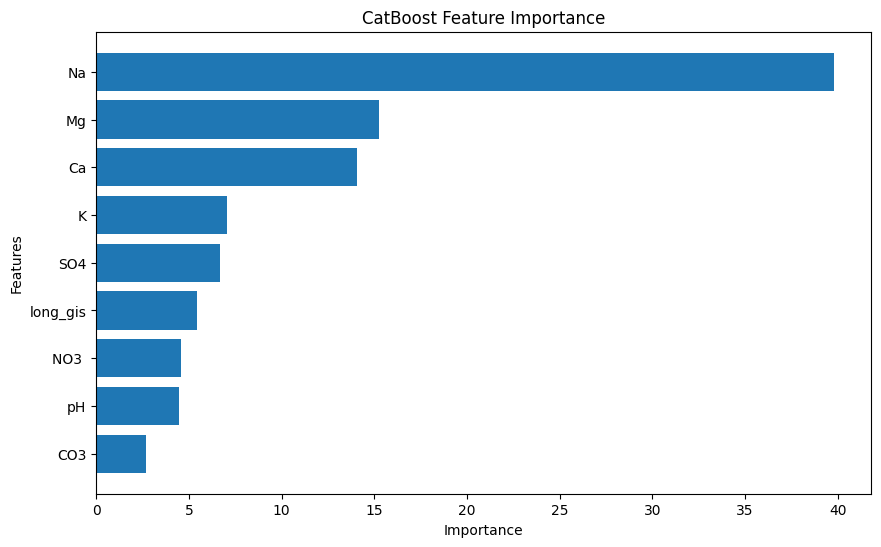

In [135]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

#### Sparrow Search Algorithm

In [46]:
from mealpy import FloatVar, SSA

In [240]:
model_ssa_cb = SSA.OriginalSSA(epoch=20, pop_size=20, ST = 0.8, PD = 0.2, SD = 0.1)
g_best_ssa_cb = model_ssa_cb.solve(problem_dict_cb)

2023-11-16 19:44:44,694 - mealpy.swarm_based.SSA.OriginalSSA - INFO - Solving 2-objective optimization problem with weights: [0.8 0.2].
2023-11-16 19:54:02,466 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 1, Current best: 0.8852618642985259, Global best: 0.8852618642985259, Runtime: 371.91296 seconds
2023-11-16 19:59:49,148 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 2, Current best: 0.8852618642985259, Global best: 0.8852618642985259, Runtime: 346.67943 seconds
2023-11-16 20:06:14,189 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 3, Current best: 0.8852618642985259, Global best: 0.8852618642985259, Runtime: 385.03786 seconds
2023-11-16 20:13:04,736 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 4, Current best: 0.8852618642985259, Global best: 0.8852618642985259, Runtime: 410.54522 seconds
2023-11-16 20:20:16,173 - mealpy.swarm_based.SSA.OriginalSSA - INFO - >>>Problem: P, Epoch: 5, Current best:

In [241]:
print(f"Solution: {g_best_ssa_cb.solution}, Fitness: {g_best_ssa_cb.target.fitness}")

Solution: [1.92903815e+03 3.24147326e+00 7.50052409e-02 2.89399194e+01
 1.11514101e-01], Fitness: 0.8898723355170155


In [148]:
best_param_ssa_cb = [1657, 4, 0.07931585702784189, 33, 0.6757980733743492]
# best_param_ssa_cb = [1617, 5, 0.08992737646817817, 29, 0.8713931449194052]

In [242]:
print("Best hyperparameters:", g_best_ssa_cb.target.fitness)
print("iteration:", int(g_best_ssa_cb.solution[0]))
print("depth:", int(g_best_ssa_cb.solution[1]))
print("learning_rate:", float(g_best_ssa_cb.solution[2]))
print("min_data_in_leaf:", int(g_best_ssa_cb.solution[3]))
print("l2_leaf_reg:", float(g_best_ssa_cb.solution[4]))


Best hyperparameters: 0.8898723355170155
iteration: 1929
depth: 3
learning_rate: 0.07500524090281394
min_data_in_leaf: 28
l2_leaf_reg: 0.11151410068950493


In [149]:
# Define the best hyperparameters as a dictionary
best_hyperparameters_ssa_cb = {
    'iterations': int(best_param_ssa_cb[0]),
    'depth': int(best_param_ssa_cb[1]),
    'learning_rate': float(best_param_ssa_cb[2]),
    'min_data_in_leaf': int(best_param_ssa_cb[3]),
    "l2_leaf_reg": float(best_param_ssa_cb[4]),
    # 'class_weights': class_weights,  # Assuming you have class_weights defined
    'task_type': device_type,
    'devices': '0:1',
    'cat_features': cat_feat_idx,
    'verbose': 0,
}

In [ ]:
import json

# Define the file path
file_path = 'best_hyperparameters_ssa_cb.json'


# Convert numpy arrays to lists
for key, value in best_hyperparameters_ssa_cb.items():
    if isinstance(value, np.ndarray):
        best_hyperparameters_ssa_cb[key] = value.tolist()

# Save the dictionary as a JSON file
with open(file_path, 'w') as f:
    json.dump(best_hyperparameters_ssa_cb, f)

print("Best hyperparameters saved to best_hyperparameters_ssa_cb.json")

Best hyperparameters saved to best_hyperparameters_ssa_cb.json


In [150]:
# Create a CatBoost classifier with the best hyperparameters
ssa_cb_model = CatBoostClassifier(**best_hyperparameters_ssa_cb)

# Train the model on your training data
ssa_cb_model.fit(train_pool_select , verbose = 1000 )

0:	learn: 1.5817960	total: 5.54ms	remaining: 9.18s
1000:	learn: 0.0169731	total: 5.63s	remaining: 3.69s
1656:	learn: 0.0071318	total: 9.67s	remaining: 0us


In [151]:
importances = ssa_cb_model.get_feature_importance(type='PredictionValuesChange')
feature_importances = pd.Series(importances, index=X_train_selected.columns).sort_values()

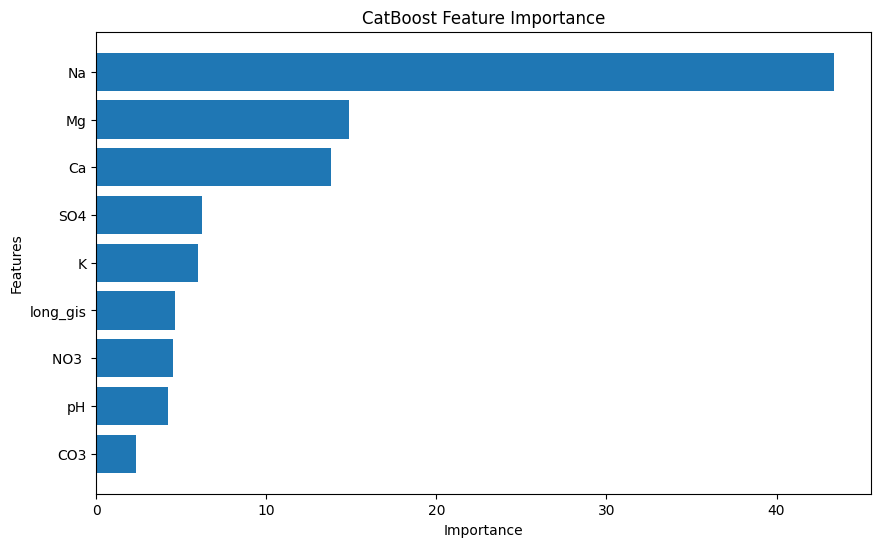

In [152]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importances.index, feature_importances.values)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# <span style="color:#e74c3c;"> Results </span>


In [252]:
from sklearn.metrics import roc_curve, auc

### Cat Boost Base Model

In [153]:
# predictions and scores

pred = cb_model.predict(test_pool)
pred_feat = cb_model_feat.predict(test_pool_select)


r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.79897
Mean Squared Error :0.13189


In [154]:
# classification report

clf_report_cb = classification_report(pred, y_test)
clf_report_cb_feat = classification_report(pred_feat, y_test)
print('===========No feature Select===========\n',clf_report_cb, '\n\n===========With Feature Select===========\n', clf_report_cb_feat)

===========No feature Select===========
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.97      0.98      0.97       752
           2       0.94      0.92      0.93       121
           3       0.91      0.78      0.84        40
           4       1.00      0.56      0.71         9
           5       0.93      0.93      0.93        14

    accuracy                           0.96      1198
   macro avg       0.95      0.85      0.89      1198
weighted avg       0.96      0.96      0.96      1198
 

===========With Feature Select===========
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       264
           1       0.97      0.98      0.98       756
           2       0.95      0.92      0.93       122
           3       0.94      0.89      0.91        36
           4       1.00      1.00      1.00         5
           5       1.00      0.93      0.97   

### With SI

#### Catboost

#### PSO

In [155]:
# predictions and scores

pred = pso_cb_model.predict(test_pool_select)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.89313
Mean Squared Error :0.07012


In [156]:
# classification report

clf_report = classification_report(pred, y_test )

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       265
           1       0.97      0.98      0.98       755
           2       0.96      0.91      0.93       124
           3       0.94      0.91      0.93        35
           4       0.80      0.80      0.80         5
           5       1.00      1.00      1.00        14

    accuracy                           0.97      1198
   macro avg       0.94      0.93      0.93      1198
weighted avg       0.97      0.97      0.97      1198



In [ ]:
model_pso_cb.history.save_global_objectives_chart(filename="pso/goc")
model_pso_cb.history.save_local_objectives_chart(filename="pso/loc")

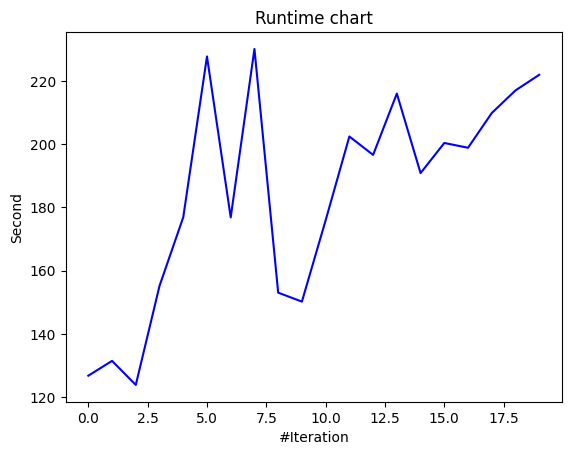

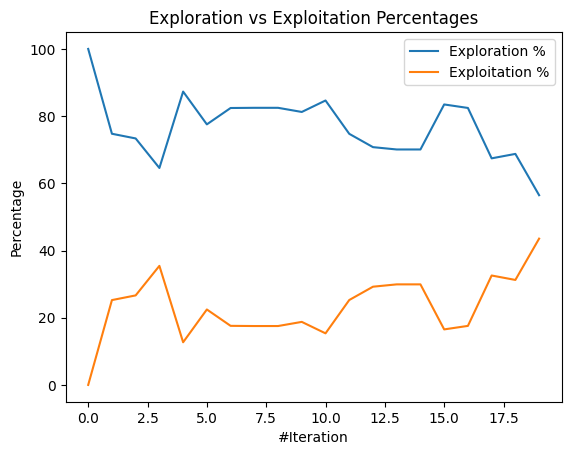

In [253]:
model_pso_cb.history.save_runtime_chart(filename="pso/rtc")
model_pso_cb.history.save_exploration_exploitation_chart(filename="pso/eec")

#### SSA

In [157]:
# predictions and scores

pred = ssa_cb_model.predict(test_pool_select)

r2_sr = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)

print('R2 Score :{0:.5f}'.format(r2_sr))
print('Mean Squared Error :{0:.5f}'.format(mse))

R2 Score :0.89313
Mean Squared Error :0.07012


In [158]:
# classification report

clf_report = classification_report(pred, y_test)

print(clf_report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       264
           1       0.97      0.98      0.98       757
           2       0.94      0.91      0.93       122
           3       0.88      0.91      0.90        33
           4       1.00      0.83      0.91         6
           5       1.00      0.88      0.93        16

    accuracy                           0.97      1198
   macro avg       0.96      0.91      0.94      1198
weighted avg       0.97      0.97      0.97      1198



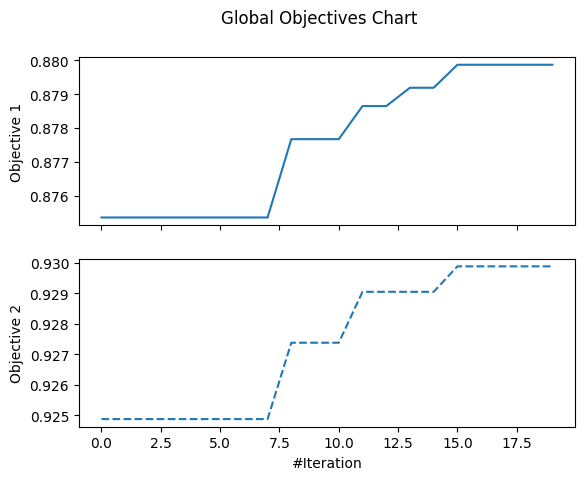

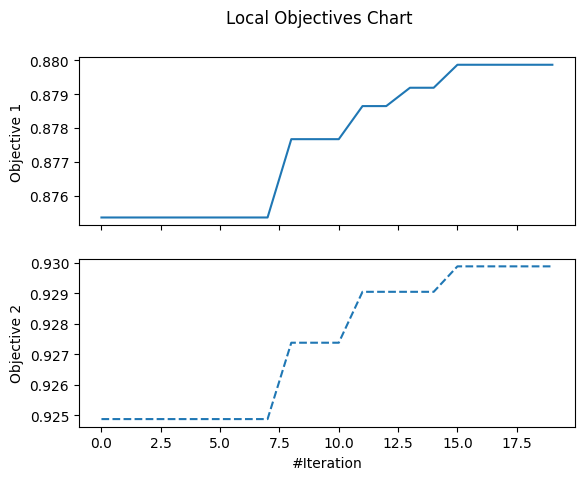

In [256]:
model_ssa_cb.history.save_global_objectives_chart(filename="ssa/goc")
model_ssa_cb.history.save_local_objectives_chart(filename="ssa/loc")

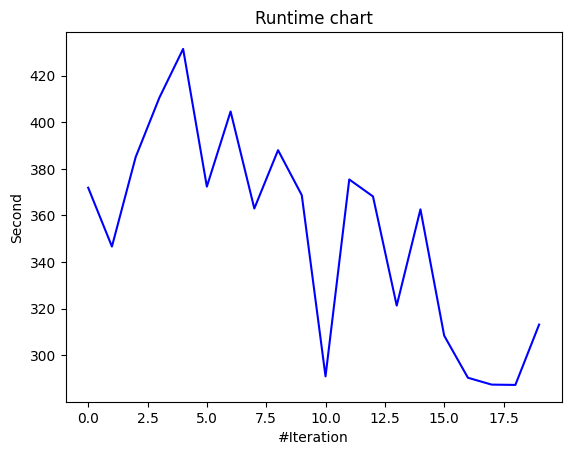

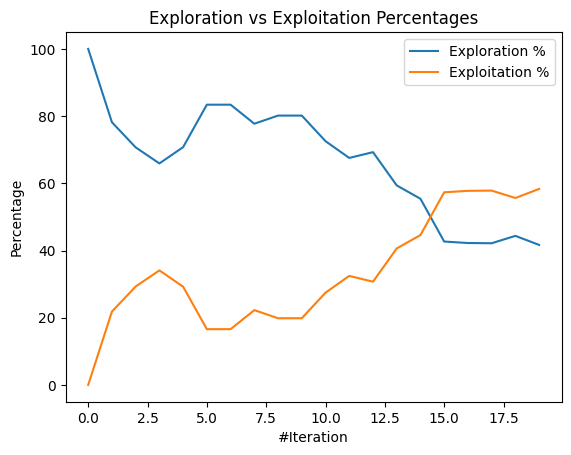

In [257]:
model_ssa_cb.history.save_runtime_chart(filename="ssa/rtc")
model_ssa_cb.history.save_exploration_exploitation_chart(filename="ssa/eec")

## Save Model

### Base Model

In [258]:
cb_model.save_model('model/model_catboost.cbm',format="cbm")

### Base with SI

In [259]:
pso_cb_model.save_model(f'model/model_pso_catboost_iter.cbm', format="cbm")

In [260]:
ssa_cb_model.save_model(f'model/model_ssa_catboost_iter.cbm', format="cbm")

# Load Model

In [261]:
from catboost import CatBoostClassifier, Pool

In [262]:
pso_cb_model = CatBoostClassifier()
ssa_cb_model = CatBoostClassifier()

pso_cb_model.load_model(f'model/model_pso_catboost_iter.cbm')
ssa_cb_model.load_model(f'model/model_ssa_catboost_iter.cbm')